<a href="https://colab.research.google.com/github/RafaelMagnusson1/study_machine_learning/blob/main/iris_dataset_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris dataset - a study about classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_iris  = pd.read_csv(r"/content/drive/MyDrive/Data Science/Livro_Scikit-Learn/iris.csv")
df_iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# EDA

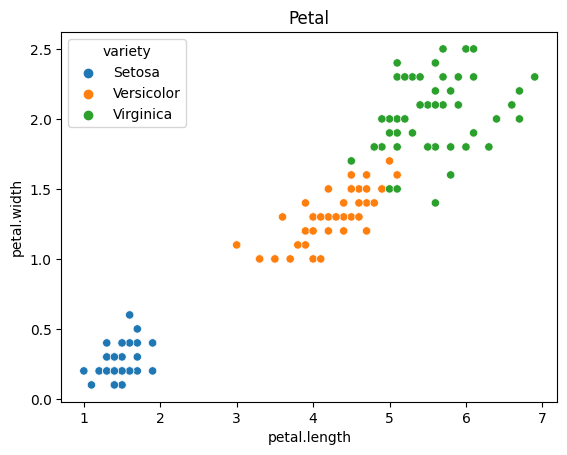

In [4]:
sns.scatterplot(data = df_iris, x = "petal.length", y = "petal.width", hue= "variety")
plt.title("Petal")
plt.show()

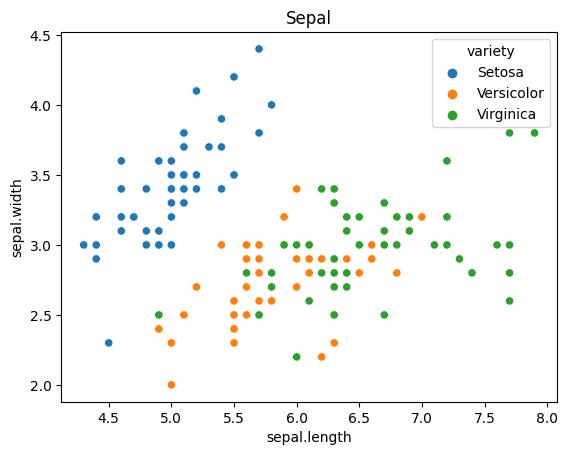

In [5]:
sns.scatterplot(data = df_iris, x = "sepal.length", y = "sepal.width", hue= "variety")
plt.title("Sepal")
plt.show()

**Spliting the data set**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df_iris.drop("variety", axis = 1)
y = df_iris["variety"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


**Normalizing the data**

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [11]:
num_pipeline = Pipeline([("std_scaler",StandardScaler())])

In [12]:
X_train_tr = num_pipeline.fit_transform(X_train)

**Model fitting**

let us start by a simple model

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
log_reg = LogisticRegression(solver = "lbfgs")

In [15]:
log_reg.fit(X_train_tr, y_train)

LogisticRegression()

In [16]:
X_train_tr[0]

array([-1.70964455,  0.35281734, -1.41805844, -1.32590711])

In [17]:
x0_pred = log_reg.predict(X_train_tr[0].reshape(1,-1))
print(x0_pred)

['Setosa']


In [18]:
y_train

42         Setosa
1          Setosa
98     Versicolor
104     Virginica
147     Virginica
          ...    
114     Virginica
130     Virginica
91     Versicolor
43         Setosa
14         Setosa
Name: variety, Length: 120, dtype: object

A correct prediction!!

Calculating the probabilitis of the measure fits in each class

In [19]:
log_reg.predict_proba(X_train_tr[0].reshape(1,-1))

array([[9.86852392e-01, 1.31474703e-02, 1.37239418e-07]])

0.98 % of chance that the instance belongs to the Setosa class (class = 1)

**Model validation**

Let us validate de model using k-fold cross validation

In [20]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [22]:
cross_val_score(log_reg,X_train,y_train, cv = 2, scoring = "accuracy")

array([0.96666667, 0.93333333])

In [23]:
np.mean(cross_val_score(log_reg,X_train,y_train, cv = 2, scoring = "accuracy"))

0.95

An average 95% accuracy for 2 folds in the cross validation. Nothing bad for the first attempt

Now, let's try the confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix

In [31]:
y_pred_log_reg = cross_val_predict(log_reg,X_train_tr,y_train, cv = 2)

In [32]:
confusion_matrix(y_train, y_pred_log_reg)

array([[38,  1,  0],
       [ 0, 36,  4],
       [ 0,  2, 39]])

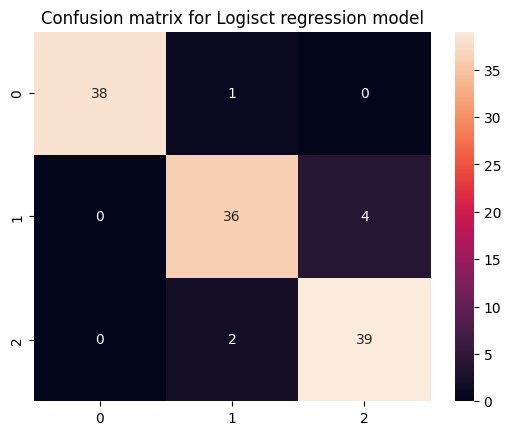

In [34]:
conf_matrix = confusion_matrix(y_train, y_pred_log_reg)
sns.heatmap(conf_matrix, annot = True)
plt.title("Confusion matrix for Logisct regression model")
plt.show()

In [40]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_train,y_pred_log_reg)

0.9416666666666667

**Trying other models**

let's create a function to fit several models in the data

In [50]:
def fit_model(X_train,y_train,model_used):
  model = model_used()
  model.fit(X_train, y_train)
  y_pred = cross_val_predict(model,X_train,y_train,cv = 3)
  y_score = cross_val_score(model,X_train, y_train, cv = 3, scoring = "accuracy")
  print(accuracy_score(y_train,y_pred))
  print(y_score)

Stocastic Gradient Descendent Classifier (SGD)

In [45]:
from sklearn.linear_model import SGDClassifier

In [51]:
fit_model(X_train_tr,y_train,SGDClassifier)

0.9166666666666666
[0.8   0.925 0.875]


Support vector Classifier SVC

In [52]:
from sklearn.svm import SVC

In [53]:
fit_model(X_train_tr,y_train,SVC)

0.975
[0.975 0.975 0.975]


Decision tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
fit_model(X_train_tr,y_train,DecisionTreeClassifier)

0.95
[0.95  0.925 0.975]


RandomForest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
fit_model(X_train_tr,y_train,RandomForestClassifier)

0.95
[0.975 0.925 0.975]


The chosen model, based on the accuracy is Support Vector Classifier

**Model optimization**

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},

In [62]:
svc_clf = SVC()

In [63]:
grid_search = GridSearchCV(svc_clf, param_grid, cv = 5, scoring = "accuracy")

In [64]:
grid_search.fit(X_train_tr,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=({'C': [1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.001, 0.0001],
                          'kernel': ['linear', 'rbf']},),
             scoring='accuracy')

In [66]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Comparing the initial model with the optimized one:

Initial model (default hyperparameters)

In [70]:
init_svc_model = SVC()

init_svc_model.fit(X_train_tr,y_train)
y_init_pred = cross_val_predict(init_svc_model,X_train,y_train,cv = 3)
print(accuracy_score(y_train,y_init_pred).round(2))

0.93


Optimized model (optimized hyperparameters)

In [71]:
opt_svc_model = SVC(C = 10, gamma = 0.1, kernel = "rbf")

opt_svc_model.fit(X_train_tr,y_train)
y_opt_pred = cross_val_predict(opt_svc_model,X_train,y_train,cv = 3)
print(accuracy_score(y_train,y_opt_pred).round(2))

0.97


# Testing the model

Now let us put the hands on the test data

In [72]:
X_test_tr = num_pipeline.fit_transform(X_test)

In [74]:
test_pred = opt_svc_model.predict(X_test_tr)

In [77]:
accuracy_score(y_test,test_pred).round(2)

0.97

97% of accuracy in the test data